In [ ]:
# default_exp data.loaders

In [ ]:
# hide
%load_ext autoreload
%autoreload 2

In [ ]:
# hide
from nbdev.showdoc import *

# Loading data
> Loaders used to get data from a file and make it usable as python objects.

In [ ]:
# export
from grade_classif.imports import *
from skimage.color import rgb2hed

In [ ]:
from grade_classif.data.read import get_items

In [ ]:
items, _ = get_items(Path('/data/DeepLearning/SCHWOB_Robin/Patches_normacolor_299/Patches_299_4/'), lambda x: x, extensions = ['.png'])

In [ ]:
from skimage.io import imread

In [ ]:
for fn in tqdm(items):
    try:
        imread(fn)
    except:
        print(fn)

In [ ]:
# export
class ItemLoader:
    def __call__(self, item):
        raise NotImplementedError

Base interface for loaders. `__call__` must be implemented in subclasses.

In [ ]:
# export
class ImageLoader(ItemLoader):
    def __init__(self, div=True):
        # self.open_mode = open_mode
        self.div = div
        # self.add_tfms = ['RGB2'+self.open_mode] if self.open_mode in ['HEG', 'H', 'E'] else []
        
    def __call__(self, item):
        # mode = cv2.IMREAD_GRAYSCALE if self.open_mode in ['G', '3G'] else cv2.IMREAD_COLOR
        # img = cv2.imread(str(item), mode)
        img = cv2.imread(str(item), cv2.IMREAD_UNCHANGED)
        # if self.open_mode is not 'G':
        #    cvt_mode = cv2.COLOR_GRAY2RGB if self.open_mode == '3G' else cv2.COLOR_BGR2RGB
        #    img = cv2.cvtColor(img, cvt_mode)
        if img.shape[-1] == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if self.div:
            img = img.astype(np.float32)/255
        return img

An image item is supposed to be stored as a path, therefore this loader is used to read the data from the corresponding file and store it in a numpy array. It can be used in using three different `open_mode`:
* `'RGB'` is default and loads the image as a 3-channel RGB array
* `'3G'` loads the image as a 3-channel grayscale array
* `'G'` loads the image as a 1-channel grayscale array
You can specify `div` to have the image values divided by 255 so that it lies in $[0, 1]$.

In [ ]:
img_path = next((Path.cwd()/'sample_data/Patches_MGI_256_5/3/CF_PACS05HE_08034-A03.11622B3').iterdir())
img_loader = ImageLoader()

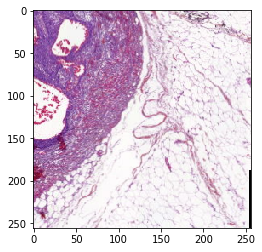

In [ ]:
img = img_loader(img_path)
plt.imshow(img)

In [ ]:
# export
class MaskLoader(ImageLoader):
    def __init__(self):
        super().__init__(div=False)

This loader is a subclass of `ImageLoader` created for segmentation masks. It forces `open_mode='G'` and `div=False`.

In [ ]:
# export
class CategoryLoader(ItemLoader):
    def __init__(self, n_classes=None, classes=None):
        if n_classes is not None:
            self.n_classes = n_classes
            if classes is None:
                self.classes = list(range(n_classes))
            else:
                self.classes = classes
        else:
            assert classes is not None, "you must either specify a list of classes or a number of classes"
            self.classes = classes
            self.n_classes = len(classes)
            
    def __call__(self, item):
        return self.classes.index(item)

Loader to use for classification. As categories are stored most of the time as `str` objects, it transforms them into integers so that they are usable by a model. 

In [ ]:
cat_loader = CategoryLoader(classes=['1', '3'])
cat_loader('1'), cat_loader('3')

(0, 1)

In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_core.ipynb.
Converted 01_train.ipynb.
Converted 02_predict.ipynb.
Converted 10_data.read.ipynb.
Converted 11_data.loaders.ipynb.
Converted 12_data.dataset.ipynb.
Converted 13_data.utils.ipynb.
Converted 14_data.transforms.ipynb.
Converted 15_data.color.ipynb.
Converted 20_models.plmodules.ipynb.
Converted 21_models.modules.ipynb.
Converted 22_models.utils.ipynb.
Converted 23_models.hooks.ipynb.
Converted 24_models.metrics.ipynb.
Converted 25_models.losses.ipynb.
Converted 80_params.defaults.ipynb.
Converted 81_params.parser.ipynb.
Converted 99_index.ipynb.
